## Incident stats

Incidents are recorded in the "Incidents" project in JIRA. P1s are listed with priority = 'Emergency' and 
P2s are listed with priority = 'High'

Count of P1s by month this year

In [1]:
$INCS = select count(*) as count, cast(date_trunc('month',cast(fields_created as DATE)) as varchar) as month,
  case
    when fields_priority_name = 'Emergency' then 'P1'
    else 'P2'
  end as priority
  from 
    jira.issues
  where 
    key like 'INC-%'
    and fields_priority_name IN ('Emergency','High')
    and fields_created >= '2022-01-01'
  group by month, fields_priority_name

12 rows

count,month,priority
3,2022-06-01,P1
1,2022-07-01,P1
2,2022-05-01,P1
3,2022-04-01,P1
3,2022-01-01,P1
1,2022-02-01,P2
4,2022-03-01,P1
6,2022-02-01,P1
2,2022-01-01,P2
2,2022-08-01,P1


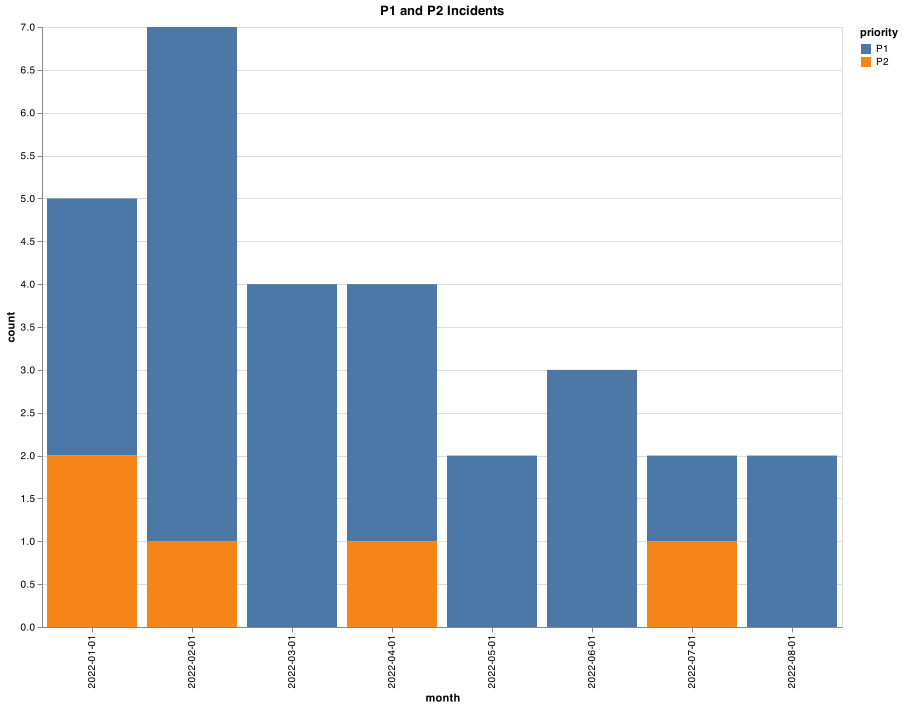

In [2]:
create chart as bar_chart where x = month and y = count and color = priority 
and title = 'P1 and P2 Incidents'

email notebook to 'scottp@berkeleyzone.net'

In [2]:
truncate papertrail.systems

0 rows

Empty DataFrame
Columns: []
Index: []

In [4]:
run at 12:00

Scheduled to run notebook Incident Stats.ipynb

In [9]:
$INCS = select 'p1' as priority, count, cast(month as varchar) as month from $p1s 
  union all 
select 'p2' as priority, count, cast(month as varchar) as month from $p2s

12 rows

priority,count,month
p1,3,2022-01-01
p1,6,2022-02-01
p1,4,2022-03-01
p1,3,2022-04-01
p1,2,2022-05-01
p1,3,2022-06-01
p1,1,2022-07-01
p1,2,2022-08-01
p2,2,2022-01-01
p2,1,2022-02-01
